# Second hand used cars dataset. Linear Regression using sklearn

## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Loading the raw data

In [2]:
raw_data = pd.read_csv('Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables.
By default, `DataFrame.describe()` gives information about only numerical data. However we can include even categorical data by using the parameter `include='all'`

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


* Firstly we can note that each feature has different counts. This implies they have missing values.  
* In case of the feature `Registration`, most of the cases seem to be 'yes'. Hence we will not be getting much information from this variable and hence we can drop it.  
* In case of `Model`, it is a categorical type of data. However it has 312 unique entries. This will be difficult to employ in a Regression. A lot of information from `Model` could be engineered from `Brand`, `Year` and `EngineV`. So we won't be losing too much variability.

To drop a feature, we will use `DataFrame.drop(columns,axis)`; which returns new object with the indicated columns dropped.  
`axis=0` means *rows*. While `axis=1` means *columns*.

In [4]:
data = raw_data.drop(['Model'], axis = 1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


`Brand`, `Body`, `Mileage`, `Engine Type`, `Registration` and `Year` all have the same count value of *4345*. Since this count is maxmimumm amongst all features, it seems they have no missing values.

### Dealing with missing values
An easy way to check for missing values is to write,
```python
data.isnull()
```
It shows us a DataFrame with the missing values. `True` stands for a missing value, while `False` for an available one.  
Since `True` is 1 and `False` is 0, we can write,  
```python
data.isnull().sum()
```
This will sum all the missing values and give us the number of missing values.

In [5]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

`price` and `EngineV` are the only features with missing values *but* only several of them. Therefore, we can simply delete those observations.  
> `Rule of Thumb:` if you are removing **< 5%** of the observations, you are free to just remove all that have missing values.

In [7]:
data_no_mv = data.dropna(axis=0) # Since we are dropping rows, axis=1

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the Probability Distribution Functions (PDFs)
We can easily plot the PDFs using Seaborn.

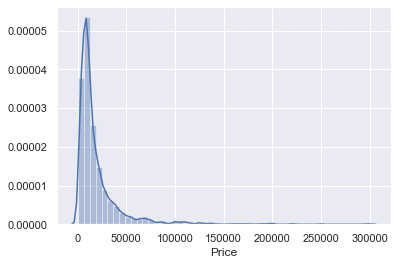

In [9]:
sns.distplot(data_no_mv['Price'])

For optimal resullts, we would be looking for a normal distribution. `Price`, however has an exponnential one.  
Looking at the descriptive statistics of price, it has a mean around 19500. Looking at its quartiles also show a slow rise. However the maximum values is unusually large. Thus, they have outliers. They will affect the regression considerably as it will try to fit these unusually large values.  
`Outliers` = observations that lie on abnormal distance from other observations in the data.  
  
One way to deal with outliers seamlessly is to remove **top 1% of observations**.  
The simplest way to do that with code is to use the `quantile` method. It returns the value at give quantile (=np.percentile). Values from 0 to 1.
```Python
DataFrame.quantile(the quantile)
```

### Dealing with outliers
Get the 99th percentile, and keep that data below it.

In [10]:
# Get the value of price at the 99th percentile.
q = data_no_mv['Price'].quantile(0.99)
# Create a new DataFrame keeping only those entries of price which are only below the 99th percentile.
data_1 = data_no_mv[data_no_mv['Price'] < q]
# Hence, maximum value will now be at 99th percentile of price.
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


While still far from the mean, the max value of price is still acceptably closer.  
The PDF will show that the data is still distributed in the same way, but with less outliers

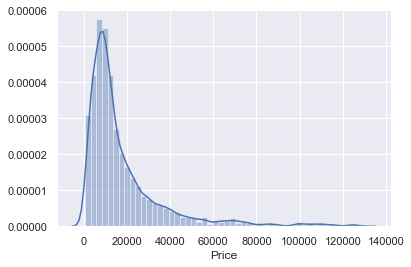

In [11]:
sns.distplot(data_1['Price'])

#### Similarly dealing with outliers of other feautures and exploring their PDFs.

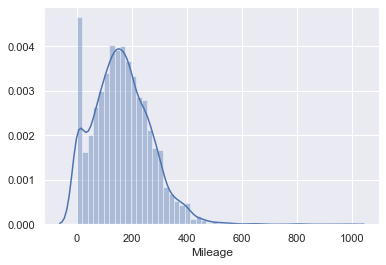

In [12]:
sns.distplot(data_no_mv['Mileage'])

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


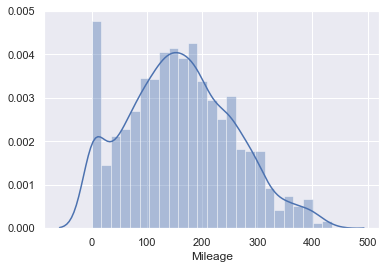

In [14]:
sns.distplot(data_2['Mileage'])

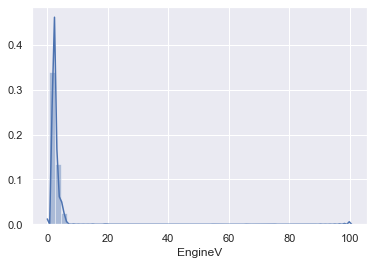

In [15]:
sns.distplot(data_no_mv['EngineV'])

In [16]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


The PDF of `EngineV` is rather strange. The higher values are not usual values. Looking at the descriptives, most values are really low.  
A quick Google search with show that intervals in which engine volumes should fall should be between 0.6 and 6.5.  
Therefore, those 99.99 and other higher values are incorrect entries. Actually a common way to assign missing values, is by assigning 99.99. This used to be done from early age of computers.  
Some people still do it, but it is problomatic because it is hard for other users to distinguish the, from true data.

In [17]:
data_3 = data_2[data_2['EngineV']<=6.5]

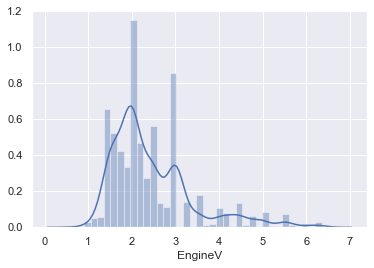

In [18]:
sns.distplot(data_3['EngineV'])

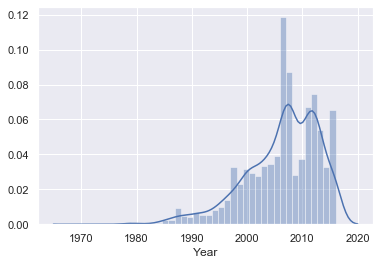

In [19]:
sns.distplot(data_no_mv['Year'])

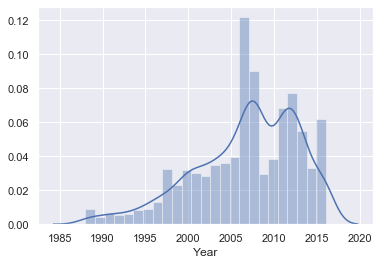

In [20]:
# Taking the first percentile of year
q = data_3['Year'].quantile(0.01)
# Taking all years above the first percentile we get
data_4 = data_3[data_3['Year']>q]

sns.distplot(data_4['Year'])

Now that we have cleaned the data, we will store it in a new variable. However, since certain values have been removed due to cleaning, we will have to reset the index. The indices refer to all the data, including the observations that have been deleted.  
The argument `drop='True'` will be used to completely forget the previous index

In [21]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.000000,3868,3868.000000,3868.000000,3868,3868,3868.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.929708,NaN,160.542399,2.451487,NaN,NaN,2006.710186
std,NaN,19085.415722,NaN,95.620925,0.951474,NaN,NaN,6.103116
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Overall we have deleted about ~250 observations. But they were the problematic ones.

##  Checking the OLS assumptions

The categorical features will be treated as dummies, so we need not worry about them when dealing with OLS assumptions.  
`Price`, `Year`, `EngineV` and `Mileage` are those that are more likely to be more challenging and cause us more problems.  
Let's check for linearity using a scatter plot.

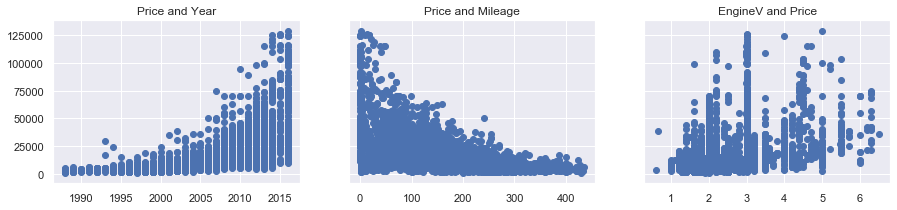

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.set_title('Price and Mileage')

ax3.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.set_title('EngineV and Price')

plt.show()

We can spot patterns, but definitely not linear ones. We know we should not run a Linear Regression in this case. We should first Transform one or more variables.  
Recall the distribution of `Price`. It was not normally distributed. And hence its relationship with other normally distributed features is not linear. The patterns are quite exponential.  
`Log transformations` are especially useful when facing exponential relationships. Lets take the log of Price and create the plots again. We can use - 
```python
np.log(x)
```
It returns the natural logarithm of a  number or array of numbers.

### Relaxing the assumptions

In [23]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


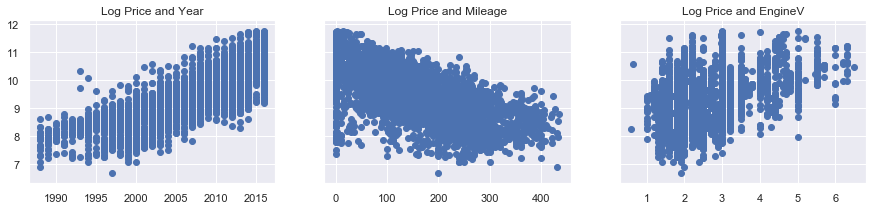

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title('Log Price and Mileage')

ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title('Log Price and EngineV')

plt.show()

We can see a linear pattern in all plots now. Lets drop the original Price vaariable from thw DataFrame, since it is no longer needed.

In [25]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

## No endogeneity assumptions
There are tests to check if it is violated. One can take their residuals and find their correlation with each individual 'x'.
This assumption is not violated and is of no interest.  
We will discuss residuals after the regression is created.

## Normality and Homoscedasticity
    ε ~ N(0,$σ^2$)  
* `Normality`  
    Normality is assumed for a big sample following the central limit theorem.
* `Zero Mean`  
    Zero Mean of the distribution of errors is accomplished with the inclusion of the intercept in the regression.
* `Homoscedasticity`  
    Generally holds as we can see in the graphs. Reason being we have already implemented a log transformation.
    Log Transformation is generally the most common fix for heteroscedasticity.

## No Autocorrelation
aka no serial correlation  
We don't really need to put much effort into that. The observations we have, are not coming from time series data or panel data.  
This data is simply a snapshot of a second hand car sales. Each roww is a separate customer who is willing to sell the car through the platform. Logically, there is no reason for the observations to be dependent on each other. 

## Multicollinearity
It is logical that `Year` and `Mileage` will be correlated. Therefore, we have grounds to expect some degree of multicollinearrity in the data.  
Unfortunately, sklearn *does not* have a dedicated method to check this assumption.  
  
Hence we will instead use `statsmodels.api`  
One of the best ways to check for multicollinearity is through `VIF(variance inflation factor)`  
VIF produces a measure which estimates how much larger the square root of a standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors.

In [26]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# We define the features we want to check for multicollinearity. We are not checking the categorical variables yet.
variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [28]:
vif

,VIF,features
0,3.792300,Mileage
1,10.332226,Year
2,7.638286,EngineV


$VIF ∈ [1,+∞)$
> VIF = 1 : no multicollinearity  
> 1 < VIF < 5 : perfectly okay (Data is rarely so perfect to come in this range)  
> VIF > 10 : generally unacceptable (No fixed consensus on what to take as limit)  

For our example, it seems `Year` is definitely too correlated with the other variables. Therefore, we will only remove 'Year'.

In [29]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create dummy variables

`Pandas` is equipped with a very useful method that can add many dummies simultaneously. It spots all categorical variables and creates dummies automatically.  
```python
pd.get_dummies(df,[, drop_first])
```
> Note  
    **If we have 'N' categories for a feature, we have to create '(N - 1)' dummies.**
    
For eg - If we consider `Brand`

| Brand | Audi Dummy | BMW Dummy | Mercedes Dummy | Mitsubishi Dummy | Renault Dummy | Toyota Dummy | Volkswagen Dummy |
|---|---|---|---|---|---|---|---|
| Audi  | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
| BMW   | 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| Mercedes | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| Mitsubishi | 0 | 0 | 0 | 1 | 0 | 0 | 0 |
| Renault | 0 | 0 | 0 | 0 | 1 | 0 | 0 |
| Toyota | 0 | 0 | 0 | 0 | 0 | 1 | 0 |
| Volkswagen | 0 | 0 | 0 | 0 | 0 | 0 | 1 |

* For the first brand, *Audi* we will not create a dummy.
* The reasoning is that if all other dummies are `0's`, its clear that the car is an audi.
* If we include a separte dummmy variable for each category, we will introduce multicollinearity to the regression. As the audi dummy will be perfectly determined by the other variables.

In [30]:
# The drop_first when set to True, ensures that Audi, is not assigned a dummy.
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
# Other than brand, all other categorical data will also be given dummy variables.
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [31]:
# Get all the column values to manually rearrange.
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [32]:
cols = [ 'log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [33]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

### Declare the inputs and the targets

In [34]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### Scale the data 

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
inputs_scaled = scaler.transform(inputs)

It is not usually recommended to standardize dummy variables. For ML purposes, we rarely put too much thought into it.  
Scaling has no effect on the predictive power of dummies, once scaled though, they will lose all their dummy meaning.  
in the practical example of logistic regression, it will be shown on how to implement a custom scaler, which standardizes only the continuous variables, while leaving the dummies unchanged.

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

### Create the regression

In [38]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In fact this is a log-linear regression, as the dependent variable is the log of 'Price'

#### Check the model wrt to predicted yhat vs y_train.
A perfect model would have all the scattered points exactly at y=x in the plot below.  
The result is not perfect, but it definitely is not random either. The model somewhat follows the relation anyway.

In [39]:
y_hat = reg.predict(x_train)

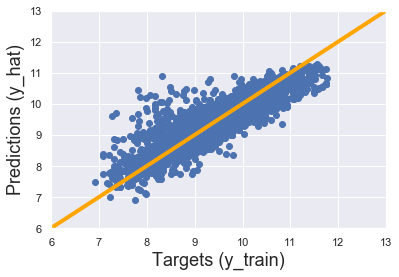

In [40]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

# Plot y=x
line = np.linspace(6, 13, 1000)
plt.plot(line, line, linestyle='solid', color='orange', linewidth=4)
plt.show()

Another popular check is the `residual plot`. The residual is the differences between the targets and the predictions. A residual plot refers to the distribution of the residuals.

Text(0.5, 1.0, 'Residuals PDF')

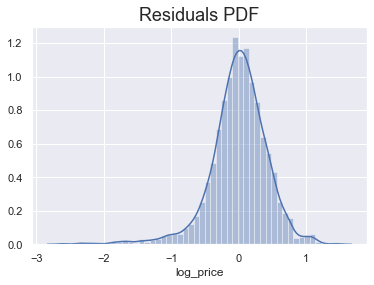

In [41]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

From the regression assumptions, we know that the errors must be normally distributed around 0. See `Normality and Homoscedasticity`  
The residuals are the estimates of the errors. so we expect the same from them.  
The residuals in this case seem to be Normal too. The mean is 0. The only possible issue is that the tail on the negative side is much longer.  
Therefore, there are certain observations for which (y_train - y_hat) is much lower than the mean. This implies that those predictions tend to overestimate the target (a much higher price is predicted than is observed).  
From the fact that there are no such observations on the right side, we conclude the predictions rarely underestimate the target.

In [42]:
reg.score(x_train,y_train)

0.7583866949948946

### Finding the weights and bias

In [43]:
reg.intercept_ 

9.42000975196255

In [44]:
reg.coef_

array([-0.45831235,  0.21216834,  0.01266665,  0.01260123, -0.14001857,
       -0.18336064, -0.06485382, -0.09380217, -0.14413603, -0.09901954,
       -0.19434177, -0.12129436, -0.16354206, -0.12097883, -0.0312541 ,
       -0.15098459,  0.31987238])

In [45]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Faetures'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Faetures,Weights
0,Mileage,-0.458312
1,EngineV,0.212168
2,Brand_BMW,0.012667
3,Brand_Mercedes-Benz,0.012601
4,Brand_Mitsubishi,-0.140019
5,Brand_Renault,-0.183361
6,Brand_Toyota,-0.064854
7,Brand_Volkswagen,-0.093802
8,Body_hatch,-0.144136
9,Body_other,-0.099020


**Weights interpretation-**  
The bigger the weight, the greater the impact.
It should be noted that Mileage has the greatest weight. (Almost twice of EngineV). It also does not make sense to compare weights of continuous variables to that of dummies. Dummies are only compared to their respective benchmark   .
  
1.) Continuous variables
* A *positive weight* shows that as a feature increases in value, so do the 'log_price' and 'Price' respectively.
* A *negative weight* shows that as a feature increases in value, 'log_price' and 'Price' decrease.  

2.)Dummy variables *For Brand, Audi was set as benchmark*  
* A *positive weight* shows that the respective category (Brand) is more expensive than the benchmark (Audi)
* A *negative weight* shows that the respective category (Brand) is less expensive than the benchmark (Audi)  

`Note`  
> For values close to 0, it will be hard to judge the dummy variables due to standardization.

In [46]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [47]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [48]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [49]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

## Testing

In [50]:
y_hat_test = reg.predict(x_test)

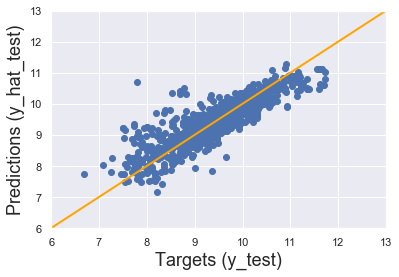

In [51]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

# Plot y=x
line = np.linspace(6, 13, 1000)
plt.plot(line, line, linestyle='solid', color='orange', linewidth=2)
plt.show()

From the above plot, we can judge, at higher prices, the points come close to the line, meaning a good prediction.  
However, at lower prices, points are much more scattered, hence prediction has more error.  
We can include an additional argument to the scatterplot called `alpha`; it specifies the opacity.
```python
plt.scatter(x,y,[,alpha])
```  
alpha takes values from 0 to 1 with 1 being the default. Reducing this value will turn our graph to a heat map of sorts. The more saturated the color, the higher the concentration of points. The paler the color, the lower the concentration of points. 

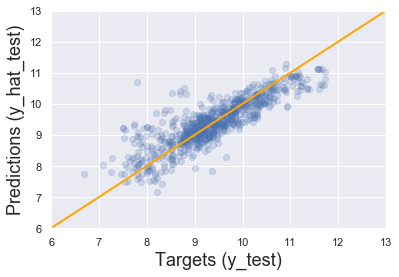

In [52]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

# Plot y=x
line = np.linspace(6, 13, 1000)
plt.plot(line, line, linestyle='solid', color='orange', linewidth=2)
plt.show()

Thus, we have a much clearer indication, showing us most of the points are indeed closer to the line.

In [53]:
# DataFrame performance. The DataFrame in it will contain the predictions.
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.277793
1,10.089695
2,8.927333
3,10.520812
4,9.340316


But this is the log prices, so we must take the exponential of them to get the prices.

In [54]:
# DataFrame performance. The DataFrame in it will contain the predictions.
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10697.793775
1,24093.437241
2,7535.144896
3,37079.226494
4,11388.000883


In [55]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10697.793775,NaN
1,24093.437241,7900.0
2,7535.144896,NaN
3,37079.226494,NaN
4,11388.000883,NaN


Unfortunately, we seem to have a lot of missing values.  
We must check the y_test DataFrame.  
What we notice is that during train-test split, pandas tried to retain original indices. we must forget these.

In [56]:
y_test.head()

1192     7.740664
2754    10.021271
2350     7.824046
3258    10.896739
892      9.121509
Name: log_price, dtype: float64

In [57]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     7.740664
1    10.021271
2     7.824046
3    10.896739
4     9.121509
Name: log_price, dtype: float64

In [58]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10697.793775,2300.0
1,24093.437241,22500.0
2,7535.144896,2500.0
3,37079.226494,54000.0
4,11388.000883,9150.0


In [59]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf.head()

,Prediction,Target,Residual
0,10697.793775,2300.0,-8397.793775
1,24093.437241,22500.0,-1593.437241
2,7535.144896,2500.0,-5035.144896
3,37079.226494,54000.0,16920.773506
4,11388.000883,9150.0,-2238.000883


This makes a lot of sense when evaluating the regression. The main reason is that `Ordinary Least Squares (OLS) framework` is based on minimizing `Sum of Squared Residuals (SSE)`. Lower error implies better explanatory power.  
Therefore, examining the residuals is the same as examining the heart of the optimization algorithm.   
We will also add the difference in percentages to make it easier to evaluate the outputs and targets.  
We will find its absolute values, since whether a nmber is of -1% or +1% is mostly irrelevant.

In [60]:
df_pf['Difference%'] = np.absolute( df_pf['Residual'] / df_pf['Target'] * 100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,10697.793775,2300.0,-8397.793775,365.121468
1,24093.437241,22500.0,-1593.437241,7.081943
2,7535.144896,2500.0,-5035.144896,201.405796
3,37079.226494,54000.0,16920.773506,31.334766
4,11388.000883,9150.0,-2238.000883,24.459026


In [61]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15807.145033,17593.980375,1786.835342,41.871280
std,12475.279463,18933.622365,10817.296888,87.038773
min,1295.979637,800.000000,-42022.517532,0.000788
25%,7569.590343,6900.000000,-2232.067327,12.142943
50%,11769.995198,11249.500000,119.098772,25.022805
75%,19930.646261,20500.000000,3168.536310,41.792289
max,78769.296407,124000.000000,80944.659722,1750.938230


The minimum difference in percentages is 0.000788%. So the output was spot on. The maximum difference in percentages is 1750% which is prettty off-mark. The quantiles tell us that for most of the predictions, we got relatively close.

In [62]:
# We can set pandas to display more rows
pd.options.display.max_rows = 999
# To make it more readable, we can change the display option for floats to 2 decimal digits
pd.set_option('display.float_format', lambda x : '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
252,9899.92,9900.00,0.08,0.00
518,4200.86,4200.00,-0.86,0.02
308,8903.04,8900.00,-3.04,0.03
72,4002.74,4000.00,-2.74,0.07
512,32545.43,32500.00,-45.43,0.14
648,21259.36,21335.00,75.64,0.35
723,6074.86,6100.00,25.14,0.41
549,3734.11,3750.00,15.89,0.42
259,6169.63,6200.00,30.37,0.49
769,29676.63,29500.00,-176.63,0.60


Our model seems to be having a high difference for relatively lower number of cases.  
On average, our model is pretty decent at predicting the price.  
As you can see all our high difference cases are coming with negative residuals, i.e, their predictions are higher than the targets. This was also seen in the Residuals PDF with long negative tails.  
An explanation may be that we are missing an important factor which drives the price of a used car lower.  
It may be the model of the car which we removed in the beginning of the analysis; But it may also be that the car is damaged in some way : A piece of information, we did not initially have.

## How to improve the model
1.) Use a different set of variables.  
2.) Remove a bigger part of the ouliers.  
3.) Use different kinds of Transformations.  

However, this model is not outstanding. The creation of a truly great model for a certain problem may consume months, or even years.  
Machine Learning requires us to revisit the model many times before we are truly happy with the result.

## Verfying some know results.
### Part 1
Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

### Part 2
As mentioned in the lecture, your task is to calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable).

### Part 3
Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

### Part 1 - Solution

In [63]:
# Let's simply use the data_preprocessed and the VIF code from above
variables = data_preprocessed
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,41.90,log_price
1,4.46,Mileage
2,13.39,EngineV
3,2.60,Brand_BMW
4,3.09,Brand_Mercedes-Benz
5,1.83,Brand_Mitsubishi
6,2.28,Brand_Renault
7,2.41,Brand_Toyota
8,3.31,Brand_Volkswagen
9,1.58,Body_hatch


Obviously, 'log_price' has a very high VIF. This implies it is most definitely **linearly correlated** with all the other variables. And this is no surprise! We are using a linear regression to determine 'log_price' given values of the independent variables! This is exactly what we expect - a linear relationship!

However, to actually assess multicollinearity for the predictors, we have to drop 'log_price'. The multicollinearity assumption refers only to the idea that the **independent variables** shoud not be collinear.

### Part 2 - Solution

In [64]:
# Let's simply drop log_price from data_preprocessed
variables = data_preprocessed.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,4.46,Mileage
1,7.83,EngineV
2,2.29,Brand_BMW
3,2.87,Brand_Mercedes-Benz
4,1.64,Brand_Mitsubishi
5,2.09,Brand_Renault
6,2.16,Brand_Toyota
7,2.84,Brand_Volkswagen
8,1.46,Body_hatch
9,1.53,Body_other


As you can see, all VIFs are pretty much acceptable. The ones that are particularly high are 'EngineV' and 'Registration_yes'. 

We already discussed 'EngineV' in the lecture.

In the case of registration, the main issue is that **most values are 'yes'** so all types of problems come from there. One way this imbalance manifests is in multicollinearity. Remember that all independent variables are pretty good at determining 'log_price'? Well, if 'registration' is always 'yes', then if we predict 'log_price' we are predicting registration, too (it is going to be 'yes'). That is why, whenever a single category is so predominant, we may just drop the variable. 

Note that it will most probably be insignificant anyways.

### Part 3 - Solution

In [65]:
# To solve this one, we must create a new variable with dummies, without dropping the first one
data_with_dummies_new = pd.get_dummies(data_no_multicollinearity)#, drop_first=True)
data_with_dummies_new.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.00,8.34,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.90,8.97,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.00,9.50,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.20,10.04,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.00,9.81,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [66]:
# Let's simply drop 'log_price' from this new variable
variables = data_with_dummies_new.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.27,Mileage
1,1.57,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


The result that we get is that very interesting indeed. Most VIFs are equal to **inf**, or plus infinity. 

We even got an warning: *RuntimeWarning: divide by zero encountered in double_scalars, vif = 1. / (1. - r_squared_i)*

The main reason is what we've discussed before. When a car is an 'Audi' all other brand dummies are 0. When a car is not 'Audi', at least one of them will be 1. By including all dummies have introduced multicollinearity (**perfect multicollinearity**)!!! 

If we run a regression including all these dummies, the coefficients would be inflated and completely off-mark. 

Now you see why we need to drop one of the dummy variables for each feature.